# Analysis of results for different parameters

## Metrics:
all metrics are calculated for each vType and averaged over many reps.
trip duration: average duration of all trips
depart delay: average delay of all trips
speed: average speed of all trips
timeLoss: average time loss of all trips in comparison to maximum possible speed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
FLOWS = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
METRICS = ["duration","speed", "departDelay", "timeLoss", "totalDelay"]
vTypes = ["Bus", "HD","AV", "all"]
av_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.997]

fontsize = 20

FileNotFoundError: [Errno 2] No such file or directory: "results_figures/Policies_['ClearFrontDL', 'ClearFront100DL', 'ClearFront500DL']_BASELINE_Nothing/flow_1000_policies_['ClearFrontDL', 'ClearFront100DL', 'ClearFront500DL']_Nothing.png"

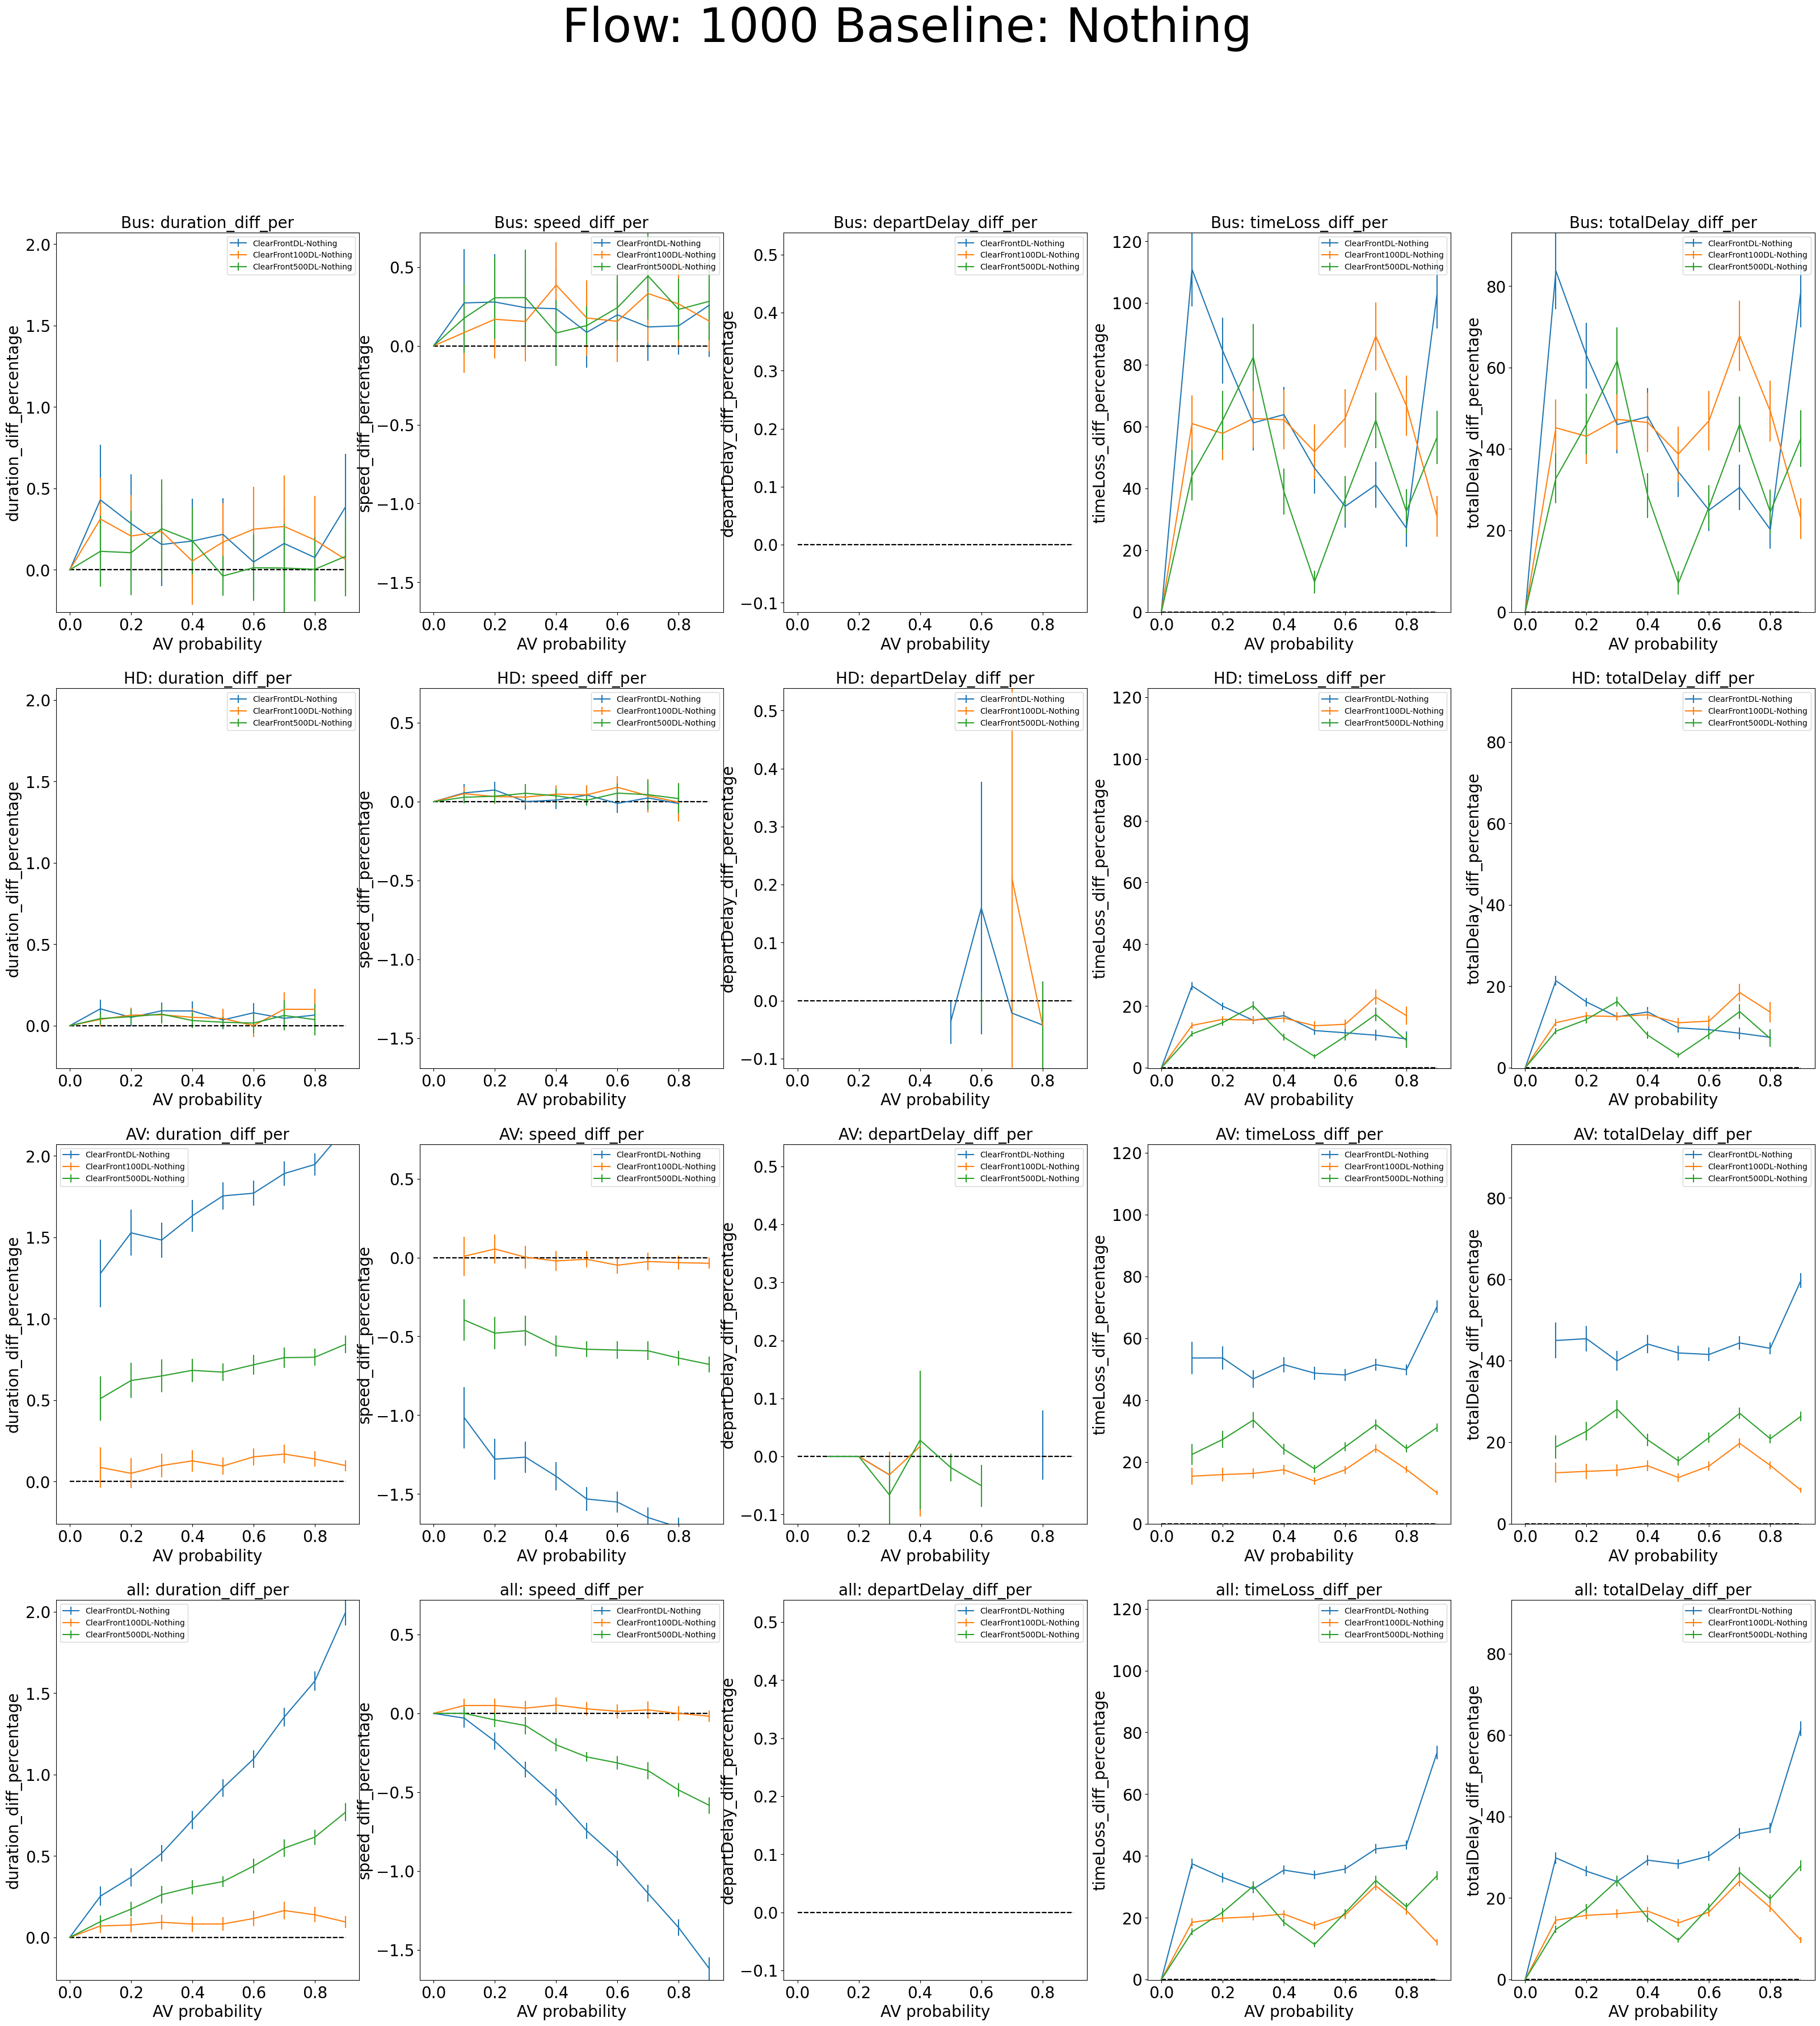

In [6]:
POLICY_NAMES = ["ClearFrontDL", "ClearFront100DL", "ClearFront500DL"]
BASELINE = "Nothing"
os.makedirs(f"results_figures/Policies_{POLICY_NAMES}_BASELINE_{BASELINE}", exist_ok=True)
for flow in FLOWS:
    fig, axs = plt.subplots(len(vTypes), len(METRICS), figsize=(40, 40))
    fig.suptitle('Flow: {} Baseline: {}'.format(flow,BASELINE), fontsize=fontsize*3)
    metrics_lims_plot = {"duration_diff": (-0.1,0.1), "speed_diff": (-0.1,0.1), "departDelay_diff": (-0.1,0.1), "timeLoss_diff": (-0.1,0.1), "totalDelay_diff": (-0.1,0.1)}
    for policy in POLICY_NAMES:
        df = pd.read_pickle("results_csvs/{}_{}_flow_{}.pkl".format(policy,BASELINE, flow))
        for i, vType in enumerate(vTypes):
            for j, metric in enumerate(METRICS):
                metric += "_diff"
                err = df[vType][f"std_{metric}"]/df[vType]["count"].pow(1/2)*1.96
                # err = df[vType][f"std_{metric}"]
                axs[i,j].errorbar(df.index, df[vType][f"avg_{metric}"], yerr=err
                                    , label=policy+f"-{BASELINE}")
                # Plot zero line
                axs[i,j].plot(df.index, np.zeros(len(df.index)), color="black", linestyle="--")
                axs[i,j].set_title("{}: {}".format(vType, metric+"_per"), fontsize=fontsize)
                axs[i,j].set_xlabel("AV probability", fontsize=fontsize)
                axs[i,j].set_ylabel(metric+"_percentage", fontsize=fontsize)
                axs[i,j].tick_params(axis='both', which='major', labelsize=fontsize)
                axs[i,j].legend()
                # Set limits
                if vType != "emergency":
                    metrics_lims_plot[metric] = (min(metrics_lims_plot[metric][0], min(df[vType][f"avg_{metric}"]-err)), max(metrics_lims_plot[metric][1], max(df[vType][f"avg_{metric}"]+err)))
    for i, vType in enumerate(vTypes):
            if vType == "emergency":
                continue
            for j, metric in enumerate(METRICS):
                metric += "_diff"
                if metrics_lims_plot[metric][0] == metrics_lims_plot[metric][1]:
                    continue
                axs[i,j].set_ylim(metrics_lims_plot[metric])
    plt.savefig(f"results_figures/Policies_{POLICY_NAMES}_BASELINE_{BASELINE}/flow_{flow}_policies_{POLICY_NAMES}_{BASELINE}.png")
    plt.close()

In [6]:
POLICY_NAMES = ["ClearFront", "ClearFront100", "ClearFront500" ]
for av_rate in [0.2,0.4,0.6,0.8]:
    fig, axs = plt.subplots(len(vTypes), len(METRICS), figsize=(40, 40))
    fig.suptitle('AV rate: {}'.format(av_rate), fontsize=fontsize*3)
    metrics_lims_plot = {"duration_diff": (-0.1,0.1), "speed_diff": (-0.1,0.1), "departDelay_diff": (-0.1,0.1), "timeLoss_diff": (-0.1,0.1), "totalDelay_diff": (-0.1,0.1)}
    for policy in POLICY_NAMES:
        df = pd.read_pickle("results_csvs/{}_Nothing_av_rate_{}.pkl".format(policy, av_rate))
        for i, vType in enumerate(vTypes):
            for j, metric in enumerate(METRICS):
                metric += "_diff"
                err = df[vType][f"std_{metric}"]/df[vType]["count"].pow(1/2)*1.96
                # err = df[vType][f"std_{metric}"]
                axs[i,j].errorbar(df.index, df[vType][f"avg_{metric}"], yerr=err
                                    , label=policy+"-Nothing")
                # Plot zero line
                axs[i,j].plot(df.index, np.zeros(len(df.index)), color="black", linestyle="--")
                axs[i,j].set_title("{}: {}".format(vType, metric+"_per"), fontsize=fontsize)
                axs[i,j].set_xlabel("Flow", fontsize=fontsize)
                axs[i,j].set_ylabel(metric+"_percentage", fontsize=fontsize)
                axs[i,j].tick_params(axis='both', which='major', labelsize=fontsize)
                axs[i,j].legend()
                # Set limit
                # s
                if vType != "emergency":
                    metrics_lims_plot[metric] = (min(metrics_lims_plot[metric][0], min(df[vType][f"avg_{metric}"]-err)), max(metrics_lims_plot[metric][1], max(df[vType][f"avg_{metric}"]+err)))
    for i, vType in enumerate(vTypes):
        if vType == "emergency":
            continue
        for j, metric in enumerate(METRICS):
            metric += "_diff"
            if metrics_lims_plot[metric][0] == metrics_lims_plot[metric][1]:
                continue
            axs[i,j].set_ylim(metrics_lims_plot[metric])
    plt.savefig(f"results_figures/av_rate_{av_rate}_policies_{POLICY_NAMES}_Nothing.png")
    plt.close()